<a href="https://colab.research.google.com/github/jovianparco/Numerical-Methods/blob/main/58015_Numerical_Integration_San.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Numerical Integration
© Bedana M., Enerio MM., Gonzales KC., Parco JA.

In [ ]:
import numpy as np
import pandas as pd
from scipy import integrate 
import matplotlib.pyplot as plt

##PART 1:

### scipy.integrate.quad

*   > #### Compute a definite integral.
*   > #### single iteration
*   > #### Integrate func from a to b



###scipy.integrate.trapezoid

*   > #### Integrate along the given axis using the composite trapezoidal rule.
*   > #### The trapezoid rule gives a better approximation of a definite integral by summing the areas of the trapezoids connecting the points
*   > #### Use trapezoidal rule to compute integral

### scipy.integrate.simpson
*   > #### Integrate y(x) using samples along the given axis and the composite Simpson’s rule. If x is None, spacing of dx is assumed.
*   > #### Simpson's rule uses a quadratic polynomial on each subinterval of a partition to approximate the function  and to compute the definite integral
*   > #### Simpson’s Rule approximates the area under f(x) over these two subintervals by fitting a quadratic polynomial through the points

### scipy.integrate.romberg

*   > #### The parameters of the function integrate.romberg are f which is the function and a and b for the upper and lower boundary
*   > #### The concept behind the romberg integration is a Composite Trapezoidal Rule with multiple iteration that is base on  Richardson extrapolation which uses k and j.
   >> #### Where k being the main approximation and j being the sweep or the one which increase the accuracy of the approximation.


##PART 2:


In [ ]:
def trapz_rule(func,lb,ub,size):
  h = (ub-lb)/size
  return h*(0.5*(func(lb)+func(ub))+np.sum(func(lb+h*np.arange(1,size))))

In [ ]:
def simp_13(func,lb,ub,divs):
  h = (ub-lb)/divs
  A = (func(lb)+func(ub))+ \
            np.sum(4*func(lb+h*np.arange(1,divs,2)))+ \
            np.sum(2*func(lb+h*np.arange(2,divs,2)))
  S = (h/3)*A
  return S

In [ ]:
def simp_38(func,lb,ub,divs):
  h = (ub-lb)/divs
  A = (func(lb)+func(ub))+ \
            np.sum(3*(func(lb+h*np.arange(1,divs,3))))+ \
            np.sum(3*(func(lb+h*np.arange(2,divs,3))))+ \
            np.sum(2*func(lb+h*np.arange(3,divs,3)))
  S = (3*h/8)*A
  return S

In [ ]:
def m_c(func,lb,ub,n):
  mean = np.sum(func(np.random.uniform(lb,ub,int(n))))/n
  S = (ub - lb)*mean 
  return S


In [ ]:
def romberg(f,a,b,n):
  r = []
  h = b - a
  r.append([(h/2)*(f(a)+f(b))])
  for i in range(1,n+1):
    h = h / 2
    sum = 0
    for k in range(1,2**i ,2):
      sum += f(a+k*h)
    rowi = [0.5*r[i-1][0] + sum*h]
    for j in range(1,i+1):
      rowi.append(rowi[j-1] + (rowi[j-1]-r[i-1][j-1])/(4**j-1))
    r.append(rowi)
  return r[-1][-1]

In [ ]:
def methods(func,lb,ub,lol):
  eq = []
  boundary = np.linspace(lb,ub)
  eq.append(trapz_rule(func, lb, ub, lol))
  eq.append(simp_13(func, lb, ub, lol))
  eq.append(simp_38(func, lb, ub, lol))
  eq.append(m_c(func, lb, ub, lol))
  eq.append(integrate.romberg(func, lb, ub, divmax = lol))
  eq.append(integrate.simps(func(boundary),boundary))
  eq.append(integrate.quad(func,lb,ub)[0])
  eq.append(integrate.trapz(func(boundary),boundary))
  eq.append(romberg(func, lb, ub, 10)) #Overwrite the "lol" value because it is memory intensive
  return eq


def method_errors (eqs, theoval):
  eq_errors = []
  for ans in eqs:
    eq_errors.append(abs( theoval- ans))
  return eq_errors


def difference(eq,errors):
  diff = pd.DataFrame(list(zip(eq, errors)), index =['Trapezoidal rule', 'Simpsons 1/3 Rule', 'Simpsons 3/8 Rule', 'Montecarlo','Romberg SP', 'Simpson SP','quad SP','trapz SP', 'Romberg'],
                                              columns =['Values', 'Error'])
  return diff

### Equation 1:


$$ \int_{-1}^{1}(x^6+3x^4-x^2)dx $$
Theoretical Value = 86/105


In [ ]:
f1 = lambda x : x**6 + 3*x**4 - x**2
a1,b1 = -1,1

In [ ]:
eq1 = methods( f1, a1,b1, 10000)
eq1_errors = method_errors(eq1, 86/105)
df1= difference(eq1, eq1_errors)
df1

,Values,Error
Trapezoidal rule,0.819048,1.066667e-07
Simpsons 1/3 Rule,0.819048,3.774758e-15
Simpsons 3/8 Rule,0.818898,1.499200e-04
Montecarlo,0.818076,9.711672e-04
Romberg SP,0.819048,0.000000e+00
Simpson SP,0.819394,3.467134e-04
quad SP,0.819048,2.220446e-16
trapz SP,0.823489,4.441113e-03
Romberg,0.819048,6.661338e-16


###Equation 2:


 $$\int_{-1}^{2}(2x^5+3x^3-x)dx $$
Theoretical Value = 123/4

In [ ]:
f2 = lambda x : 2*x**5 + 3*x**3 - x 
a2, b2 = -1, 2

In [ ]:
eq2 = methods( f2, a2,b2, 10000)
eq2_errors = method_errors(eq2, 123/4)
df2 = difference(eq2, eq2_errors)
df2

,Values,Error
Trapezoidal rule,30.750001,1.327500e-06
Simpsons 1/3 Rule,30.750000,7.105427e-15
Simpsons 3/8 Rule,30.743552,6.447806e-03
Montecarlo,31.497335,7.473353e-01
Romberg SP,30.750000,0.000000e+00
Simpson SP,30.752773,2.773016e-03
quad SP,30.750000,0.000000e+00
trapz SP,30.805282,5.528244e-02
Romberg,30.750000,3.552714e-15


###Equation 3: 

$$\int_{0}^{\pi/2}(sin(x)^7cos(x)^2)dx $$
Theoretical Value = 16/315

In [ ]:
f3 = lambda x : ((np.sin(x))**7)*(np.cos(x))**2
a3, b3 = 0, np.pi/2

In [ ]:
eq3 = methods( f3, a3,b3, 10000)
eq3_errors = method_errors(eq3, 16/315)
df3 = difference(eq3, eq3_errors)
df3

,Values,Error
Trapezoidal rule,0.050794,6.938894e-18
Simpsons 1/3 Rule,0.050794,6.938894e-18
Simpsons 3/8 Rule,0.050794,1.614889e-13
Montecarlo,0.050029,7.642716e-04
Romberg SP,0.050794,9.478529e-15
Simpson SP,0.050796,2.734507e-06
quad SP,0.050794,0.000000e+00
trapz SP,0.050794,4.669876e-15
Romberg,0.050794,3.469447e-17


###Equation 4:

$$\int_{0}^{\pi/2}(sin(x)^4)dx $$
Theoretical Value = 3pi/16


In [ ]:
f4 = lambda x : (np.sin(x))**4
a4, b4 = 0, np.pi/2

In [ ]:
eq4 = methods( f4, a4,b4, 10000)
eq4_errors = method_errors(eq4, 3*np.pi/16)
df4 = difference(eq4, eq4_errors)
df4

,Values,Error
Trapezoidal rule,0.589049,0.000000e+00
Simpsons 1/3 Rule,0.589049,0.000000e+00
Simpsons 3/8 Rule,0.589009,3.926991e-05
Montecarlo,0.576989,1.205978e-02
Romberg SP,0.589049,6.483702e-14
Simpson SP,0.589043,5.483085e-06
quad SP,0.589049,0.000000e+00
trapz SP,0.589049,0.000000e+00
Romberg,0.589049,0.000000e+00


###Equation 5:

 $$\int_{-4}^{4}(\frac{1}{16+x^2})dx$$

Theoretical Value = pi/8

In [ ]:
f5 = lambda x : ((1) / (16+ x**2))
a5, b5 = -4, 4

In [ ]:
eq5 = methods( f5, a5,b5, 10000)
eq5_errors = method_errors(eq5, np.pi/8)
df5 = difference(eq5, eq5_errors)
df5

,Values,Error
Trapezoidal rule,0.392699,8.333333e-10
Simpsons 1/3 Rule,0.392699,5.551115e-17
Simpsons 3/8 Rule,0.392693,6.250625e-06
Montecarlo,0.392289,4.096822e-04
Romberg SP,0.392699,5.392464e-12
Simpson SP,0.392700,7.077082e-07
quad SP,0.392699,5.551115e-17
trapz SP,0.392664,3.470776e-05
Romberg,0.392699,6.106227e-16


###Equation 6:


 $$\int_{2}^{4}(\frac{6+x^2}{x^3})dx $$
 
Theoretical Value = (9/16) + ln(2)

In [ ]:
f6 = lambda x : ((6+x**2)/(x**3))
a6, b6 = 2, 4 

In [ ]:
eq6 = methods( f6, a6,b6, 10000)
eq6_errors = method_errors(eq6, (9/16) + np.log(2) )
df6 = difference(eq6, eq6_errors)
df6

,Values,Error
Trapezoidal rule,1.255647,4.140625e-09
Simpsons 1/3 Rule,1.255647,2.220446e-16
Simpsons 3/8 Rule,1.255630,1.718816e-05
Montecarlo,1.252421,3.226009e-03
Romberg SP,1.255647,1.476597e-13
Simpson SP,1.255654,7.128089e-06
quad SP,1.255647,0.000000e+00
trapz SP,1.255820,1.724315e-04
Romberg,1.255647,2.220446e-16


##PART 3:

###Equation:


 $$\int_{0}^{\pi/2}(sin(x)^4)dx $$
Theoretical Value = 3pi/16

##Law of Big Numbers - Simpson's 3/8 

In [ ]:
big_num_simp_38 = []
for bin in np.linspace (100000, 0, 100, endpoint=False):
  big_num_simp_38.append(abs(((123/4)) - (simp_38(f2, a2,b2,bin))))

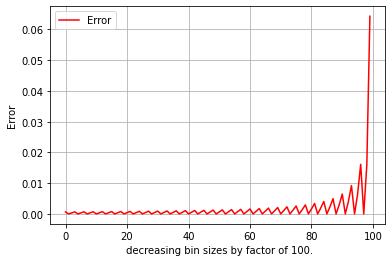

In [ ]:
y = big_num_simp_38
x = np.arange(0,100)
plt.plot(x, y,label='Error',c="r")
plt.xlabel(" decreasing bin sizes by factor of 100.")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

With the Monte Carlo Simulation, as the bin size increases, the overall accuracy also increases. As shown in the output plot above, this code has a downward trend from 1 to 100 interactions increasing the bin size by a factor of 100, meaning the higher the bin size, the higher accuracy it will have. 

##Law of Big Numbers - Monte Carlo Simulation

In [ ]:
big_num_m_c = []
for bin in np.linspace (500, 10000, 100, endpoint=True):
  big_num_m_c.append(abs(((123/4)) - (m_c(f2, a2,b2,bin))))

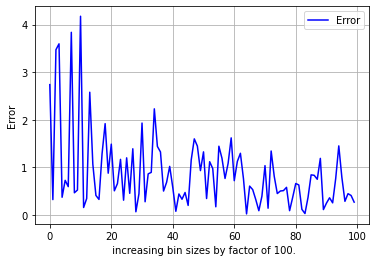

In [ ]:
y = big_num_m_c
x = np.arange(0,100)
plt.plot(x, y,label='Error',c="b")
plt.xlabel(" increasing bin sizes by factor of 100.")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

With the Monte Carlo Simulation, as the bin size incerease the over all accuracy also increases, as shown in the plot at the top it has a downward trend from 1 to 100 interations incereasing the bin size by a factor of 100 meaning the larger the bin size the higher accuracy it will have.  

#### Reference


[1]  “numeth2021/NuMeth_6_Numerical_Integration.ipynb at main · dyjdlopez/numeth2021.” https://github.com/dyjdlopez/numeth2021 - Numerical Integration/NuMeth_6_Numerical_Integration.ipynb (accessed May 15, 2021).

[2] “Romberg Integration.” https://mathsci2.appstate.edu/~wmcb/Class/4310/ClassNotes131/Romberg_Program_Listings.pdf (accessed May 16, 2021).

[3]	J. Lambers, “Romberg Integration.” https://www.math.usm.edu/lamber`s/mat460/fall09/lecture29.pdf (accessed May 16, 2021).

[4]	“Numerical Integration - Romberg Integration - YouTube.” https://www.youtube.com/watch?v=vzo47UoDwDA (accessed May 16, 2021).

[5] SciPy.org(2021) - https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html (accessed May 16, 2021).

[6] geeksforgeeks(2020) -https://www.geeksforgeeks.org/python-scipy-integrate-quad-method/ (accessed May 16, 2021)

[7] tutorialpoint(2019)- https://www.tutorialspoint.com/scipy/scipy_integrate.htm (accessed May 16, 2021).

[8] SciPy.org(2021) - https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html#scipy.integrate.trapezoid (accessed May 16, 2021)

[9] math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/ (accessed May 16, 2021)

[10] southampton.ac.uk(2020)- https://www.southampton.ac.uk/~fangohr/teaching/python/book/html/16-scipy.html (accessed May 16, 2021)

[11] SciPy.org(2021)- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html#scipy.integrate.simpson (accessed May 16, 2021)

[12] math.ubc.ca(2018) - https://www.math.ubc.ca/~pwalls/math-python/integration/simpsons-rule/ (accessed May 16, 2021)

[13] pythonnumericalmethods.berkeley.edu(2020) - https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html (accessed May 16, 2021)

